# Explore Fws across populations

This notebook takes sample-level F<sub>*WS*</sub> scores from the MalariaGEN Pf8 data release and generates a box plot of F<sub>*WS*</sub>  scores, summarised at the subpopulation-level.

A quick recap: F<sub>*WS*</sub> is a measure of sample clonality. High values (i.e. >0.95) mean a sample contains a high proportion of, or exclusively, clones of the same parasite strain. Low values indicate a mix of different parasite strains within a sample. For a more detailed explanation of the F<sub>*WS*</sub> metric, see [this paper](https://www.nature.com/articles/nature11174) by Manske *et al.* (2012).

**This notebook should take around one minute to run.**

## Setup

Install and import the malariagen Python package:

In [1]:
!pip install malariagen_data -q --no-warn-conflicts
import malariagen_data

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Import required python libraries that are installed at colab by default.

In [2]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from google.colab import drive

## Access Pf8 Data

We use the malariagen data package to load the release data.

In [ ]:
release_data = malariagen_data.Pf8()
df_samples = release_data.sample_metadata()

Then we load the file containing sample-level F<sub>*WS*</sub> data

In [2]:
# Load FWS scores
# Read data directly from url
fws_df = pd.read_csv('https://pf8-release.cog.sanger.ac.uk/Pf8_fws.tsv', sep='\t')

# Print the shape and first rows
print(fws_df.shape)
fws_df.head()

(24409, 2)


,Sample,Fws
0,FP0008-C,0.820692
1,FP0009-C,0.998084
2,FP0010-CW,0.822654
3,FP0011-CW,0.755678
4,FP0012-CW,0.995906


## Subset and combine the data frames

For the most reliable results, we only want to look at samples which have passed quality control (QC)

In [5]:
# Select only QC-passed samples
sample_selection = df_samples['QC pass']
print(np.unique(sample_selection, return_counts=True))

# Return a new data frame containing only QC-passed samples
qcplus_samples = df_samples.loc[sample_selection]
qcplus_samples.shape

(array([False,  True]), array([ 8916, 24409]))


(24409, 17)

There are 24,409 QC-passed samples in Pf8

In [6]:
# Match FWS scores to corresponding QC-passed samples by merging the data frames
fws_qcplus_samples = pd.merge(qcplus_samples, fws_df, on='Sample', how='left')
fws_qcplus_samples.head()

,Sample,Study,Country,Admin level 1,Country latitude,Country longitude,Admin level 1 latitude,Admin level 1 longitude,Year,ENA,All samples same case,Population,% callable,QC pass,Exclusion reason,Sample type,Sample was in Pf7,Fws
0,FP0008-C,1147-PF-MR-CONWAY,Mauritania,Hodh el Gharbi,20.265149,-10.337093,16.565426,-9.832345,2014.0,ERR1081237,FP0008-C,AF-W,82.48,True,Analysis_set,gDNA,True,0.820692
1,FP0009-C,1147-PF-MR-CONWAY,Mauritania,Hodh el Gharbi,20.265149,-10.337093,16.565426,-9.832345,2014.0,ERR1081238,FP0009-C,AF-W,88.95,True,Analysis_set,gDNA,True,0.998084
2,FP0010-CW,1147-PF-MR-CONWAY,Mauritania,Hodh el Gharbi,20.265149,-10.337093,16.565426,-9.832345,2014.0,ERR2889621,FP0010-CW,AF-W,87.01,True,Analysis_set,sWGA,True,0.822654
3,FP0011-CW,1147-PF-MR-CONWAY,Mauritania,Hodh el Gharbi,20.265149,-10.337093,16.565426,-9.832345,2014.0,ERR2889624,FP0011-CW,AF-W,86.95,True,Analysis_set,sWGA,True,0.755678
4,FP0012-CW,1147-PF-MR-CONWAY,Mauritania,Hodh el Gharbi,20.265149,-10.337093,16.565426,-9.832345,2014.0,ERR2889627,FP0012-CW,AF-W,89.86,True,Analysis_set,sWGA,True,0.995906


In [7]:
# Check there are as many samples as we expected (24,409)
fws_qcplus_samples.shape


(24409, 18)

## Generate population-level summaries

Here we define the ten subpopulations present in Pf8, listing their acronyms, full names, and assigning colours to be used in plotting. We store the information in an ordered dictionary.

In [8]:
georegions = collections.OrderedDict([
    ('SA',dict(n='South America', c='#4daf4a')),
    ('AF-W',dict(n='West Africa', c='#e31a1c')),
    ('AF-C',dict(n='Central Africa', c='#fd8d3c')),
    ('AF-NE',dict(n='Northeast Africa', c='#bb8129')),
    ('AF-E',dict(n='East Africa', c='#fecc5c')),
    ('AS-S-E',dict(n='Eastern South Asia', c='#dfc0eb')),
    ('AS-S-FE',dict(n='Far-Eastern South Asia', c='#984ea3')),
    ('AS-SE-W',dict(n='Western Southeast Asia', c='#9ecae1')),
    ('AS-SE-E',dict(n='Eastern Southeast Asia', c='#3182bd')),
    ('OC-NG',dict(n='Oceania and Papua New Guinea', c='#f781bf'))])

We can generate summaries of F<sub>*WS*</sub>  for each population

In [9]:
for p in georegions.keys():

    # Filter the data for the current population
    population_data = fws_qcplus_samples[fws_qcplus_samples['Population'] == p]['Fws']

    # Calculate mean, median, min, and max
    mean_fws = np.nanmean(population_data)
    median_fws = np.nanmedian(population_data)
    min_fws = np.nanmin(population_data)
    max_fws = np.nanmax(population_data)

    # Print the results
    print(
        f"{p}: Mean = {mean_fws:.03f}, Median = {median_fws:.03f}, "
        f"Range = ({min_fws:.03f}, {max_fws:.03f})"
    )

SA: Mean = 0.988, Median = 0.998, Range = (0.585, 1.000)
AF-W: Mean = 0.867, Median = 0.974, Range = (0.155, 1.000)
AF-C: Mean = 0.868, Median = 0.958, Range = (0.225, 1.000)
AF-NE: Mean = 0.900, Median = 0.996, Range = (0.241, 1.000)
AF-E: Mean = 0.842, Median = 0.951, Range = (0.181, 1.000)
AS-S-E: Mean = 0.914, Median = 0.992, Range = (0.441, 1.000)
AS-S-FE: Mean = 0.910, Median = 0.994, Range = (0.354, 1.000)
AS-SE-W: Mean = 0.960, Median = 0.997, Range = (0.402, 1.000)
AS-SE-E: Mean = 0.967, Median = 0.996, Range = (0.356, 1.000)
OC-NG: Mean = 0.964, Median = 0.998, Range = (0.477, 1.000)


## Plot the data

We will generate a box plot to display the data. For simplicity, we exclude outliers from displaying in the plot.

**What does a box plot show?**

- Coloured box: the middle 50% of values for each population. This is also known as the interquartile range.
- Line inside the box: the median value for each population.
- Whiskers: the lines extending from the box show the range of F<sub>*WS*</sub> values, excluding extreme outliers.

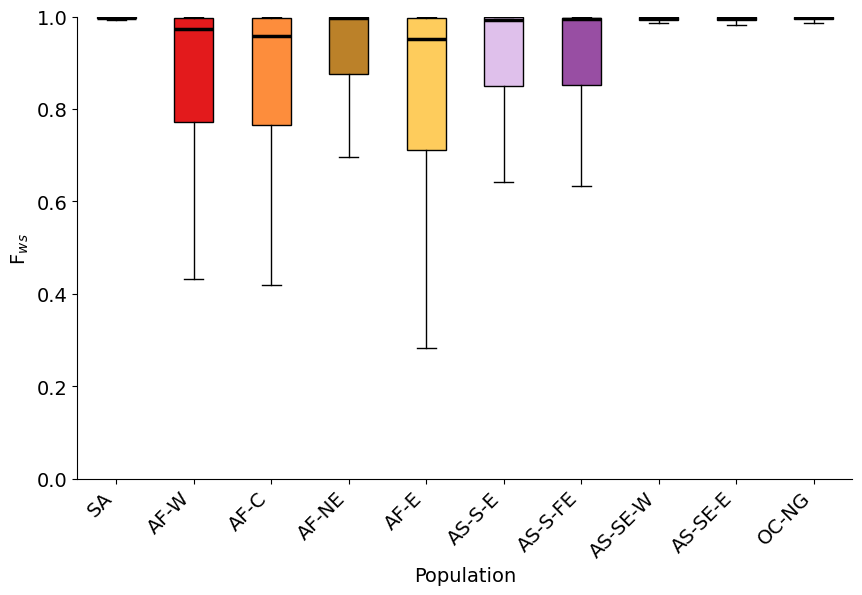

In [10]:
# Set up plot parameters
rcParams = plt.rcParams
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

fig, ax = plt.subplots(figsize=(10, 6)) # Figure size

# Hide spines (the plot space outline)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# List all populations
all_pops = [g for g in georegions.keys()]

# Set up the number of boxplot positions to account for all populations
pos = np.arange(1, len(all_pops) + 1)

# Create boxplot without outliers
bplt = ax.boxplot(
    [np.array(fws_qcplus_samples[fws_qcplus_samples['Population'] == g]['Fws']) for g in georegions.keys()],
    medianprops=dict(color='black', linewidth=2.5, solid_capstyle='butt'),
    patch_artist=True,
    positions=pos,
    showfliers=False  # Hides outliers
)

# Color each box according to georegions
for patch, color in zip(bplt['boxes'], [georegions[x]['c'] for x in all_pops]):
    patch.set_facecolor(color)

# Set axis limits and labels
ax.set_ylim([0, 1])
ax.set_ylabel(r'F$_w$$_s$')
ax.set_xlabel('Population')

# Add x-axis labels
ax.set_xticks(pos)
ax.set_xticklabels(all_pops, rotation=45, ha='right')

# Show plot
plt.show()


**Figure legend:** F<sub>*WS*</sub> scores per subpopulation in Pf8. We can see that African populations tend to have lower F<sub>*WS*</sub> , indicating that these samples tend to be formed of a mix of parasite strains. This is expected in a region like Africa, where malaria transmission is high. The exception is that Northeast Africa shows intermediate levels of sample clonality, more similar to South Asian populations.  We see very clonal samples in South America, Southeast Asia, and Oceania.

## Save the figure

In [11]:
# You will need to authorise Google Colab access to Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# This will send the file to your Google Drive, where you can download it from if needed
# Change the file path if you wish to send the file to a specific location
# Change the file name if you wish to call it something else

fig.savefig('/content/drive/My Drive/FWS_figure.pdf', bbox_inches='tight')
fig.savefig('/content/drive/My Drive/FWS_Figure.png', dpi=480, bbox_inches='tight') # increase the dpi for higher resolution